Epoch 1/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2695 - accuracy: 0.9208 - val_loss: 0.1329 - val_accuracy: 0.9606
Epoch 2/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.1117 - accuracy: 0.9657 - val_loss: 0.1081 - val_accuracy: 0.9682
Epoch 3/10
1500/1500 [==============================] - 2s 2ms/step - loss: 0.0772 - accuracy: 0.9761 - val_loss: 0.0974 - val_accuracy: 0.9704
Epoch 4/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0580 - accuracy: 0.9820 - val_loss: 0.0947 - val_accuracy: 0.9716
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0449 - accuracy: 0.9857 - val_loss: 0.1152 - val_accuracy: 0.9697
Epoch 6/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0338 - accuracy: 0.9891 - val_loss: 0.1045 - val_accuracy: 0.9722
Epoch 7/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0292 - accuracy: 0.9901 - val_loss: 0.1003 - val_accuracy:

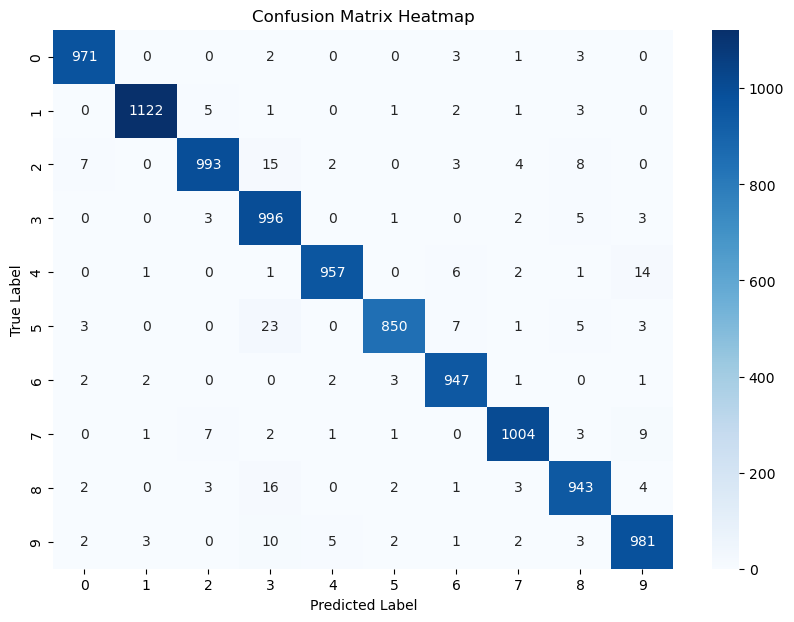

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Step 1: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
x_train = x_train.astype('float32') / 255.0  # Normalize the data to [0, 1]
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, num_classes=10)  # One-hot encoding
y_test = to_categorical(y_test, num_classes=10)

# Step 3: Build the DNN Model with 2 hidden layers
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the input
    Dense(128, activation='relu'),   # First hidden layer
    Dense(64, activation='relu'),    # Second hidden layer
    Dense(10, activation='softmax')   # Output layer
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Step 5: Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Step 6: Generate confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

# Step 7: Plot confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
